In [7]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

#### 1. Load the training csv file

In [24]:
# load the training labels
#train_df = pd.read_csv("train_1.csv")
df = pd.read_csv("cassava-leaf-disease-classification/train_1.csv")
df['label'] = df['label'].astype(str)
df

,image_id,label
0,2615227158.jpg,4
1,1277648239.jpg,3
2,2305895487.jpg,3
3,336299725.jpg,2
4,1951270318.jpg,2
...,...,...
17112,318991539.jpg,3
17113,1180914426.jpg,3
17114,3601015067.jpg,2
17115,3037445022.jpg,3


#### 2. Load a large image set using ImageDataGenerator

In [37]:
# prapare the loader for the training and validation sets
image_path = 'cassava-leaf-disease-classification/train_imgs_1/'

# ImageDataGenerator to imge augmentation: create larger training set using existing data
data_generator = ImageDataGenerator(
    rescale=1./255, # all values in [0, 1]
    validation_split=0.20,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

print('the training set loader.')
train_data_loader = data_generator.flow_from_dataframe(
    df,
    directory=image_path,
    x_col="image_id",
    y_col="label",
    target_size=(224, 224), # resize images to 224*224
    batch_size=32, 
    subset='training'
)
print('the validation set loader.')
val_data_loader = data_generator.flow_from_dataframe(
    df,
    directory=image_path,
    x_col="image_id",
    y_col="label",
    target_size=(224, 224),
    batch_size=32, 
    subset='validation'
)

the training set loader.
Found 13694 validated image filenames belonging to 5 classes.
the validation set loader.
Found 3423 validated image filenames belonging to 5 classes.


Training images


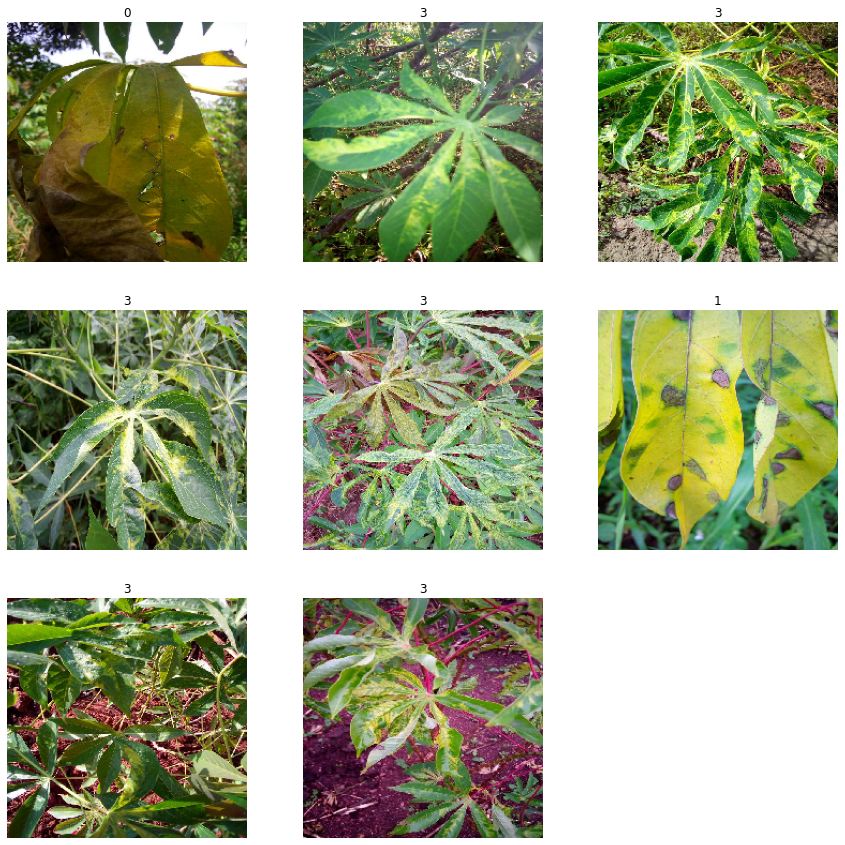

In [30]:
plt.figure(figsize=(15, 15))
print('Training images')
for images, labels in train_data_loader:
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow((images[i] * 255).astype("uint8"))
        plt.title(np.argmax(labels[i]))
        plt.axis("off")
    break
plt.show()

In [36]:
print(labels.shape)
labels # one-hot coding automatically
images.shape

(32, 5)


(32, 224, 224, 3)

In [ ]:
# suppose we already have a model
#mode = ...

history=model.fit(train_data_loader, 
          validation_data=val_data_loader, 
          batch_size=32, epochs=10)